 # Machine Learning Assignment 8
 
# AdaBoost to classify Iris dataset

In [16]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn import svm
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Import train_test_split function
from sklearn.model_selection import train_test_split

#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

from prettytable import PrettyTable

In [17]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
print("Shape of the iris_df is", iris_df.shape)
iris_df.sample(5)

Shape of the iris_df is (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
94,5.6,2.7,4.2,1.3,1
101,5.8,2.7,5.1,1.9,2
12,4.8,3.0,1.4,0.1,0
66,5.6,3.0,4.5,1.5,1
51,6.4,3.2,4.5,1.5,1


# Visualizations on Iris dataset

In [3]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


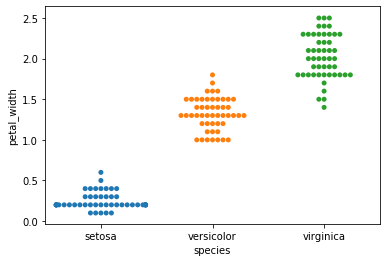

In [4]:
sns.swarmplot(x= 'species',y = 'petal_width',data = iris)

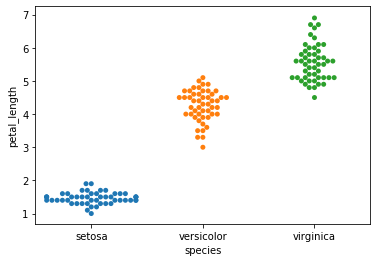

In [5]:
sns.swarmplot(x= 'species',y = 'petal_length',data = iris)

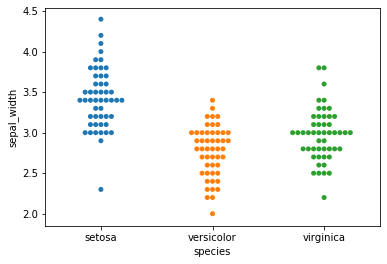

In [6]:
sns.swarmplot(x= 'species',y = 'sepal_width',data = iris)

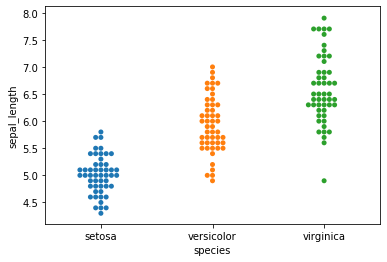

In [7]:
sns.swarmplot(x= 'species',y = 'sepal_length',data = iris)

In [18]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Spliting the Iris dataset into training and test subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Decision tree with max-depth = 1

accuracy score: 53.33
+------------+---------------------+-------------------------+------------------------+
|  species   | Predicted as setosa | Predicted as versicolor | Predicted as virginica |
+------------+---------------------+-------------------------+------------------------+
|   setosa   |          12         |            0            |           0            |
| versicolor |          0          |            12           |           0            |
| virginica  |          0          |            21           |           0            |
+------------+---------------------+-------------------------+------------------------+


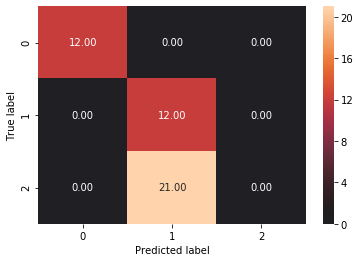

In [19]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=1)
# classifier2 = AdaBoostClassifier(base_estimator=dtc, n_estimators=50,learning_rate=1)
model2 = dtc.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
print("accuracy score: %.2f"%(accuracy_score(y_test, y_pred2)*100))

matrix2 = confusion_matrix(y_test, y_pred2)
x1 = PrettyTable()
x1.field_names = ['species','Predicted as setosa', 'Predicted as versicolor', 'Predicted as virginica']
x1.add_row(['setosa',matrix2[0][0],matrix2[0][1],matrix2[0][2]])
x1.add_row(['versicolor',matrix2[1][0],matrix2[1][1],matrix2[1][2]])
x1.add_row(['virginica',matrix2[2][0],matrix2[2][1],matrix2[2][2]])
print(x1)
sns.heatmap(matrix2,annot=True, center=True,fmt="0.2f")#, linewidths=1,square=True)#, cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# AdaBoost classifier - decision tree classifier with max_depth=1

accuracy score: 95.56
+------------+---------------------+-------------------------+------------------------+
|  species   | Predicted as setosa | Predicted as versicolor | Predicted as virginica |
+------------+---------------------+-------------------------+------------------------+
|   setosa   |          12         |            0            |           0            |
| versicolor |          0          |            10           |           2            |
| virginica  |          0          |            0            |           21           |
+------------+---------------------+-------------------------+------------------------+


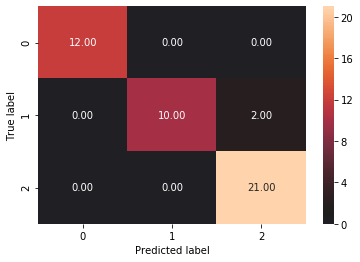

In [20]:
abc_default = AdaBoostClassifier(n_estimators=50,learning_rate=1)

# Train Adaboost Classifer
model = abc_default.fit(X_train, y_train)

#Predict the response for test dataset

y_pred = model.predict(X_test)
print("accuracy score: %.2f"%(accuracy_score(y_test, y_pred)*100))

#cm.print_stats()
matrix = confusion_matrix(y_test, y_pred)
x = PrettyTable()
x.field_names = ['species','Predicted as setosa', 'Predicted as versicolor', 'Predicted as virginica']
x.add_row(['setosa',matrix[0][0],matrix[0][1],matrix[0][2]])
x.add_row(['versicolor',matrix[1][0],matrix[1][1],matrix[1][2]])
x.add_row(['virginica',matrix[2][0],matrix[2][1],matrix[2][2]])
print(x)
sns.heatmap(matrix,annot=True, center=True,fmt="0.2f")#, linewidths=1,square=True)#, cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Replacing the default weak learner/ base_estimator of AdaBoost with various other weak classifiers

# 1. Support vector classifier

accuracy score: 97.78
+------------+---------------------+-------------------------+------------------------+
|  species   | Predicted as setosa | Predicted as versicolor | Predicted as virginica |
+------------+---------------------+-------------------------+------------------------+
|   setosa   |          12         |            0            |           0            |
| versicolor |          0          |            12           |           0            |
| virginica  |          0          |            1            |           20           |
+------------+---------------------+-------------------------+------------------------+


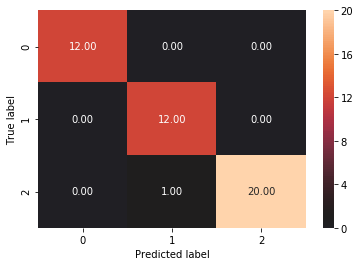

In [21]:
svc=SVC(probability=True, kernel='linear')
classifier1 = AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)
model1 = classifier1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print("accuracy score: %.2f"%(accuracy_score(y_test, y_pred1)*100))

matrix1 = confusion_matrix(y_test, y_pred1)
x = PrettyTable()
x.field_names = ['species','Predicted as setosa', 'Predicted as versicolor', 'Predicted as virginica']
x.add_row(['setosa',matrix1[0][0],matrix1[0][1],matrix1[0][2]])
x.add_row(['versicolor',matrix1[1][0],matrix1[1][1],matrix1[1][2]])
x.add_row(['virginica',matrix1[2][0],matrix1[2][1],matrix1[2][2]])
print(x)
sns.heatmap(matrix1,annot=True, center=True,fmt="0.2f")#, linewidths=1,square=True)#, cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 2. Decision Tree 

accuracy score: 91.11
+------------+---------------------+-------------------------+------------------------+
|  species   | Predicted as setosa | Predicted as versicolor | Predicted as virginica |
+------------+---------------------+-------------------------+------------------------+
|   setosa   |          12         |            0            |           0            |
| versicolor |          0          |            10           |           2            |
| virginica  |          0          |            2            |           19           |
+------------+---------------------+-------------------------+------------------------+


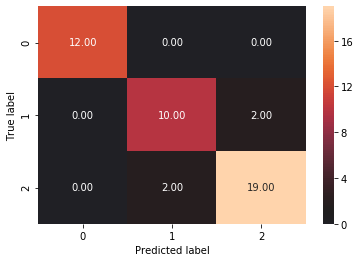

In [22]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)
classifier2 = AdaBoostClassifier(base_estimator=dtc, n_estimators=50,learning_rate=1)
model2 = classifier2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
print("accuracy score: %.2f"%(accuracy_score(y_test, y_pred2)*100))

matrix2 = confusion_matrix(y_test, y_pred2)
x1 = PrettyTable()
x1.field_names = ['species','Predicted as setosa', 'Predicted as versicolor', 'Predicted as virginica']
x1.add_row(['setosa',matrix2[0][0],matrix2[0][1],matrix2[0][2]])
x1.add_row(['versicolor',matrix2[1][0],matrix2[1][1],matrix2[1][2]])
x1.add_row(['virginica',matrix2[2][0],matrix2[2][1],matrix2[2][2]])
print(x1)
sns.heatmap(matrix2,annot=True, center=True,fmt="0.2f")#, linewidths=1,square=True)#, cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# 3. Random Forest 

accuracy score: 95.56
+------------+---------------------+-------------------------+------------------------+
|  species   | Predicted as setosa | Predicted as versicolor | Predicted as virginica |
+------------+---------------------+-------------------------+------------------------+
|   setosa   |          12         |            0            |           0            |
| versicolor |          0          |            10           |           2            |
| virginica  |          0          |            0            |           21           |
+------------+---------------------+-------------------------+------------------------+


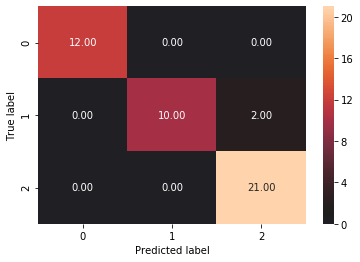

In [23]:
# Random Forest Classifier
rfc = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
classifier3 = AdaBoostClassifier(base_estimator=rfc, n_estimators=50,learning_rate=1)
model3 = classifier3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
print("accuracy score: %.2f"%(accuracy_score(y_test, y_pred3)*100))

matrix3 = confusion_matrix(y_test, y_pred3)
x = PrettyTable()
x.field_names = ['species','Predicted as setosa', 'Predicted as versicolor', 'Predicted as virginica']
x.add_row(['setosa',matrix3[0][0],matrix3[0][1],matrix3[0][2]])
x.add_row(['versicolor',matrix3[1][0],matrix3[1][1],matrix3[1][2]])
x.add_row(['virginica',matrix3[2][0],matrix3[2][1],matrix3[2][2]])
print(x)
sns.heatmap(matrix3,annot=True, center=True,fmt="0.2f")#, linewidths=1,square=True)#, cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Other Classifiers without AdaBoost list

In [24]:
names = ["Linear SVM", "Gaussian Process",
         "Decision Tree", "Random Forest",
         "Naive Bayes"]

classifiers = [
    svm.SVC(kernel='linear', gamma=0.3, C=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GaussianNB()]

Linear SVM
accuracy score: 95.56
confusion matrix:
+------------+---------------------+-------------------------+------------------------+
|  species   | Predicted as setosa | Predicted as versicolor | Predicted as virginica |
+------------+---------------------+-------------------------+------------------------+
|   setosa   |          12         |            0            |           0            |
| versicolor |          0          |            10           |           2            |
| virginica  |          0          |            0            |           21           |
+------------+---------------------+-------------------------+------------------------+


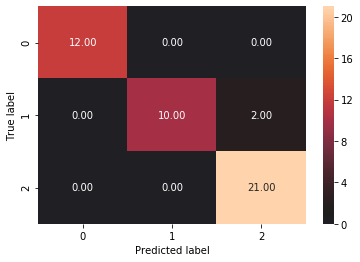

Gaussian Process
accuracy score: 93.33
confusion matrix:
+------------+---------------------+-------------------------+------------------------+
|  species   | Predicted as setosa | Predicted as versicolor | Predicted as virginica |
+------------+---------------------+-------------------------+------------------------+
|   setosa   |          12         |            0            |           0            |
| versicolor |          0          |            10           |           2            |
| virginica  |          0          |            1            |           20           |
+------------+---------------------+-------------------------+------------------------+


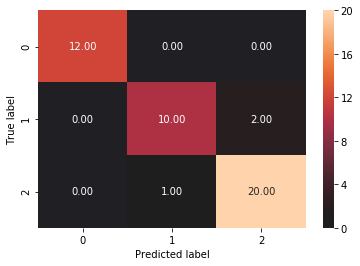

Decision Tree
accuracy score: 91.11
confusion matrix:
+------------+---------------------+-------------------------+------------------------+
|  species   | Predicted as setosa | Predicted as versicolor | Predicted as virginica |
+------------+---------------------+-------------------------+------------------------+
|   setosa   |          12         |            0            |           0            |
| versicolor |          0          |            10           |           2            |
| virginica  |          0          |            2            |           19           |
+------------+---------------------+-------------------------+------------------------+


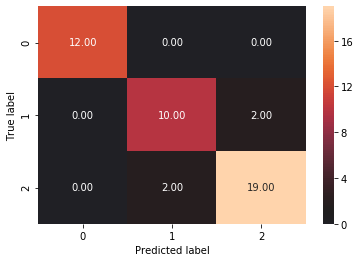

Random Forest
accuracy score: 91.11
confusion matrix:
+------------+---------------------+-------------------------+------------------------+
|  species   | Predicted as setosa | Predicted as versicolor | Predicted as virginica |
+------------+---------------------+-------------------------+------------------------+
|   setosa   |          12         |            0            |           0            |
| versicolor |          0          |            10           |           2            |
| virginica  |          0          |            2            |           19           |
+------------+---------------------+-------------------------+------------------------+


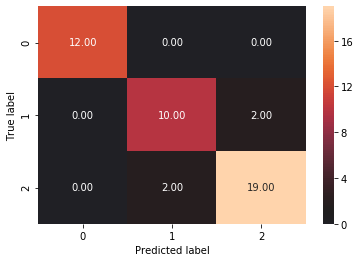

Naive Bayes
accuracy score: 93.33
confusion matrix:
+------------+---------------------+-------------------------+------------------------+
|  species   | Predicted as setosa | Predicted as versicolor | Predicted as virginica |
+------------+---------------------+-------------------------+------------------------+
|   setosa   |          12         |            0            |           0            |
| versicolor |          0          |            11           |           1            |
| virginica  |          0          |            2            |           19           |
+------------+---------------------+-------------------------+------------------------+


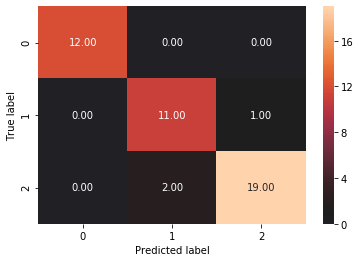

In [25]:
for name, clf in zip(names, classifiers):
    
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(name)
    print("accuracy score: %.2f"%(accuracy_score(y_test, pred)*100))
    print("confusion matrix:")
    matrix = confusion_matrix(y_test, pred)
    x = PrettyTable()
    x.field_names = ['species','Predicted as setosa', 'Predicted as versicolor', 'Predicted as virginica']
    x.add_row(['setosa',matrix[0][0],matrix[0][1],matrix[0][2]])
    x.add_row(['versicolor',matrix[1][0],matrix[1][1],matrix[1][2]])
    x.add_row(['virginica',matrix[2][0],matrix[2][1],matrix[2][2]])
    print(x)
    sns.heatmap(matrix,annot=True, center=True,fmt="0.2f")#, linewidths=1,square=True)#, cmap='Blues_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

Authors:

Shravanthi Arvind Patil

Sreenivasa Hikkal Venugopala